In [1]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

In [2]:
%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

[[[199 213 240]
  [200 214 240]
  [200 214 240]
  ...
  [ 86  34  96]
  [ 48   4  57]
  [ 57  21  65]]

 [[199 213 239]
  [200 214 240]
  [200 214 240]
  ...
  [215 215 251]
  [252 242 255]
  [237 218 250]]

 [[200 214 240]
  [200 214 240]
  [201 215 241]
  ...
  [227 238 255]
  [167 180 197]
  [ 61  79  91]]

 ...

 [[136 112 108]
  [137 113 109]
  [140 116 112]
  ...
  [ 85  84  63]
  [ 91  90  69]
  [ 93  92  72]]

 [[119  90  84]
  [118  89  83]
  [119  90  84]
  ...
  [ 86  84  61]
  [ 89  87  64]
  [ 90  88  65]]

 [[129  96  89]
  [129  96  89]
  [131  98  91]
  ...
  [ 86  82  57]
  [ 89  85  60]
  [ 89  85  60]]]


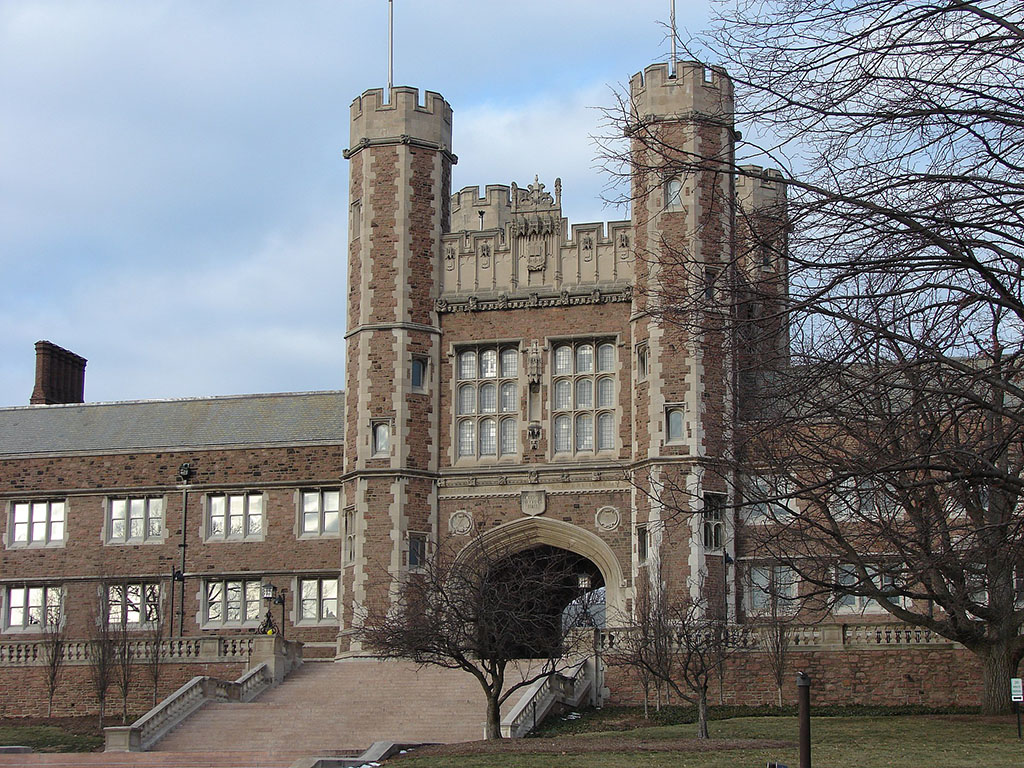

In [3]:
img

In [ ]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

In [ ]:
img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

In [ ]:
print("Rows: {}, Cols: {}".format(rows,cols))

In [ ]:
# Create a new image within the old instance of the img
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)

In [ ]:
img2_array

In [ ]:
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

In [ ]:
img2_array

In [ ]:
img2 = Image.fromarray(img2_array, 'RGB')
img2

### Standardize Images

In [4]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
  "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
  "https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg",
  "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"   
]

https://data.heatonresearch.com/images/jupyter/brookings.jpeg


/tmp/ipykernel_62615/3436914029.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


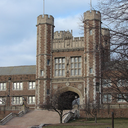

https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg


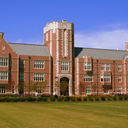

https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg


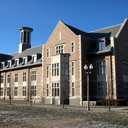

(3, 49152)


In [5]:
def crop_square(image):        
    width, height = image.size
    
    # Crop the image, centered
    new_width = min(width,height)
    new_height = new_width
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    return image.crop((left, top, right, bottom))
    
x = []

for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = crop_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)

# Adding Noise

Rows: 768, Cols: 1024
(768, 1024, 3)


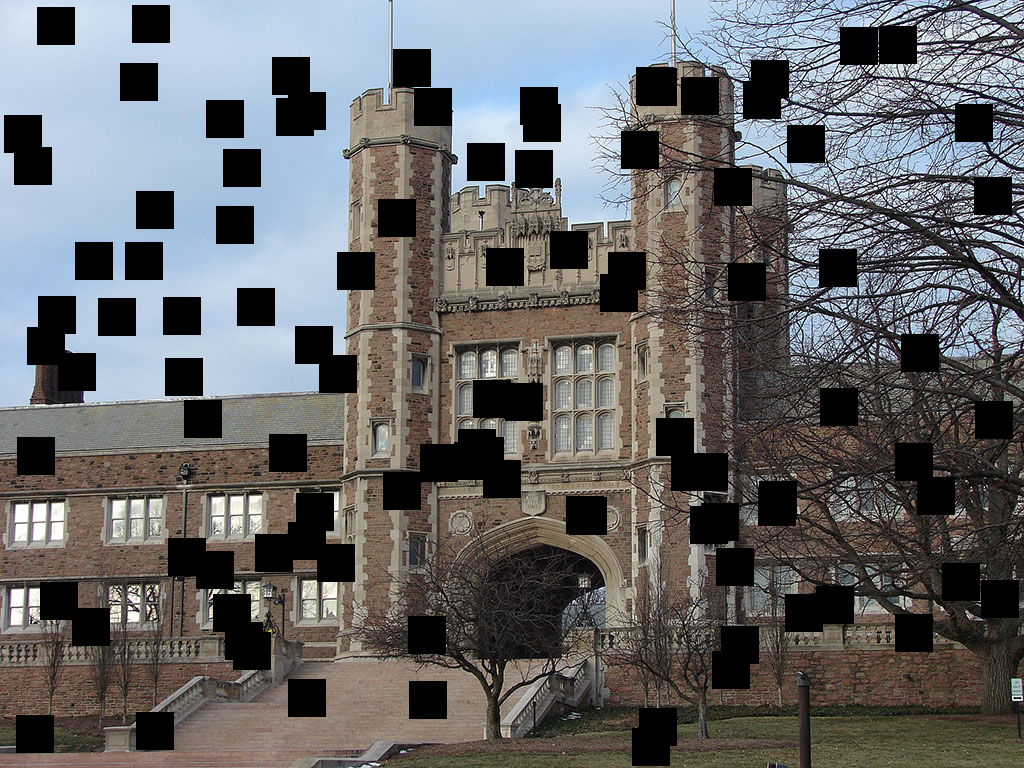

In [7]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

# Preprocessing Many Images